## Prepare

In [1]:
import gym 
import robohive
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import Image as IPyImage

RoboHive:> Registering Arms Envs
RoboHive:> Registering Myo Envs
RoboHive:> Registering Hand Envs
RoboHive:> Registering Claw Envs
RoboHive:> Registering Appliances Envs
RoboHive:> Registering Multi-Task (2 subtasks) Envs
RoboHive:> Registering FrankaKitchen (FK1) Envs
RoboHive:> Registering Multi-Task (9 subtasks) Envs
RoboHive:> Registering Quadruped Envs
RoboHive:> Registering UR5 Envs


In [2]:
env = gym.make('Ur5ReachFixedCam-v0')
env.reset();

    RoboHive: A unified framework for robot learning | https://sites.google.com/view/robohive
        Code: https://github.com/vikashplus/robohive/stargazers (add a star to support the project)
    


{'time': array([8.]),
 'qp_robot': array([-2.3000e+00, -2.3449e+00,  1.8611e+00, -1.0539e+00, -1.5701e+00,
        -7.3000e-01,  5.4000e-02,  5.3998e-02,  5.0000e-01, -4.0000e-01,
         6.9784e-02,  1.0000e+00,  3.4920e-17,  5.1833e-19, -4.2433e-30]),
 'qv_robot': array([-1.0892e-13, -1.0560e-13,  5.3897e-14,  5.3939e-14, -4.9795e-14,
        -2.7486e-14,  1.3598e-15,  7.7492e-16, -3.9500e-20,  1.8796e-17,
         2.6784e-15, -9.0430e-16, -8.8766e-17, -1.8153e-30]),
 'reach_err': array([0.0076, 0.2919, 0.9088])}

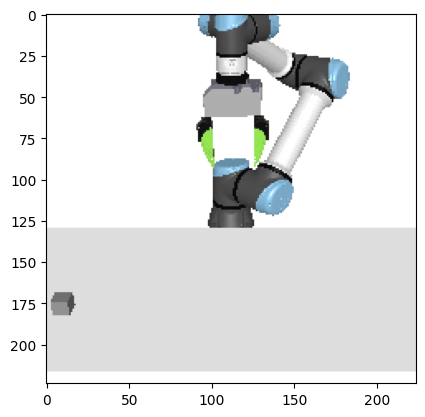

In [3]:
# go to initial position
for _ in range(100):
    action = [-2.30, -2.34, 1.85, -1.06, -1.57, -0.73, 0.054]
    allinfo_tdt = env.step(action)
    
obs = env.get_obs(update_exteroception=True)
plt.imshow(env.visual_dict['rgb:front:224x224:2d'])
env.obs_dict

## Replay trajectory

In [4]:
def save_gif(images, path='tmp.gif', width=300):
    images[0].save(path, format="GIF", append_images=images, save_all=True, duration=100, loop=0)
    
    with open('grasp_fixed.gif','rb') as f:
        return IPyImage(data=f.read(), format='png', width=width)

In [5]:
def replay_trajectory(trajectory, camera_name='rgb:front:224x224:2d'):
    images = []
    diffs = []
    target = []
    current = []
    
    for _ in range(100):
        env.step(trajectory[0])
        
    for action in trajectory:
        env.step(action)
        env.step(action)
        env.step(action)
        env.step(action)
        env.get_obs(update_exteroception=True)
        
        pos = env.obs_dict['qp_robot'][:7]
        diffs.append(abs(action - pos))
        target.append(action)
        current.append(pos)
        
        image = env.visual_dict[camera_name]
        images.append(Image.fromarray(image))
        
    return {
        'images': images,
        'diffs': np.array(diffs),
        'target': np.array(target),
        'current': np.array(current),
    }
        

In [6]:
trajectory = np.loadtxt('grasp_fixed.txt')
trajectory = np.delete(trajectory, 7, axis=1)
trajectory.shape

(24, 7)

In [7]:
result = replay_trajectory(trajectory)
images = result['images']
diffs = result['diffs']
target = result['target']
current = result['current']

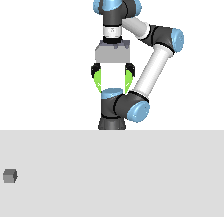

In [8]:
save_gif(images, 'grasp_fixed.gif')

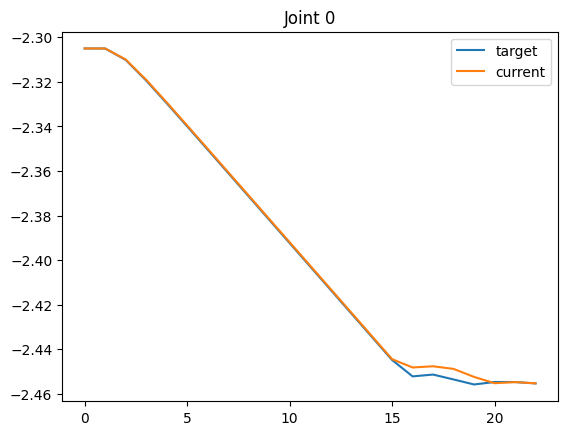

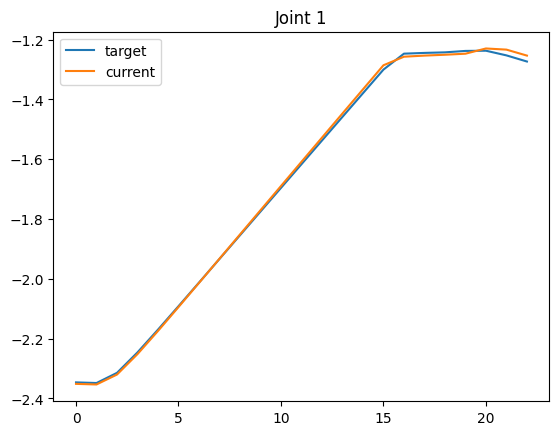

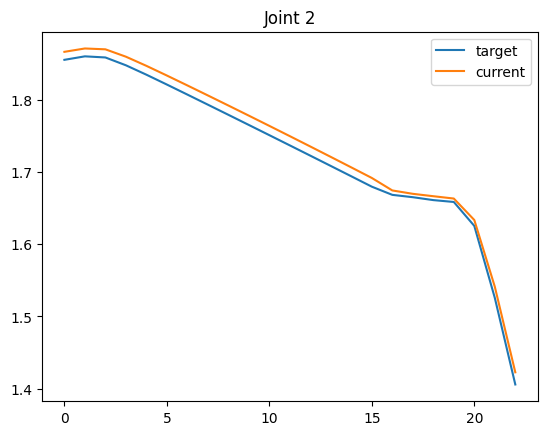

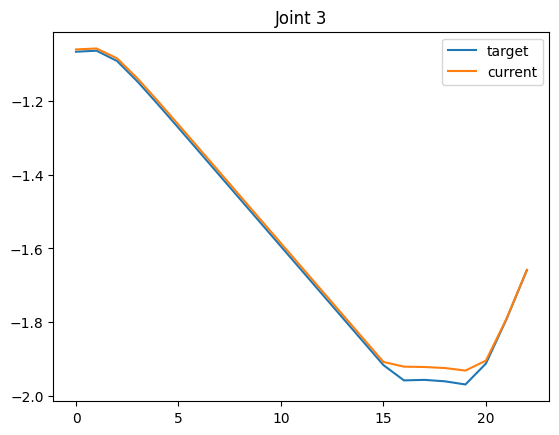

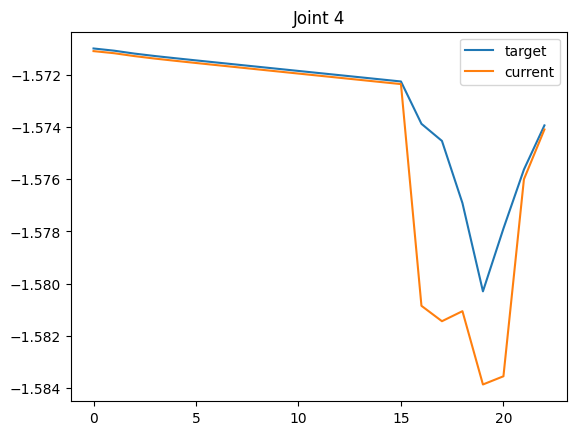

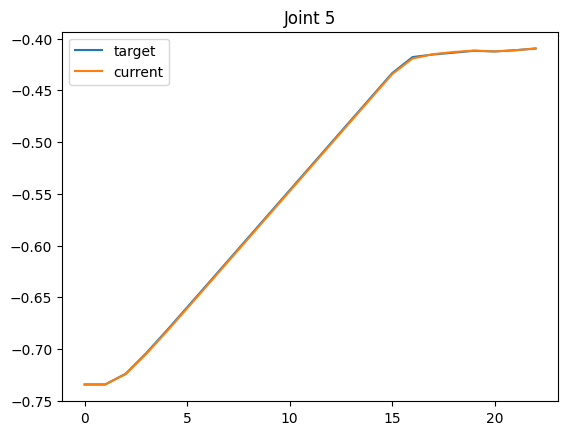

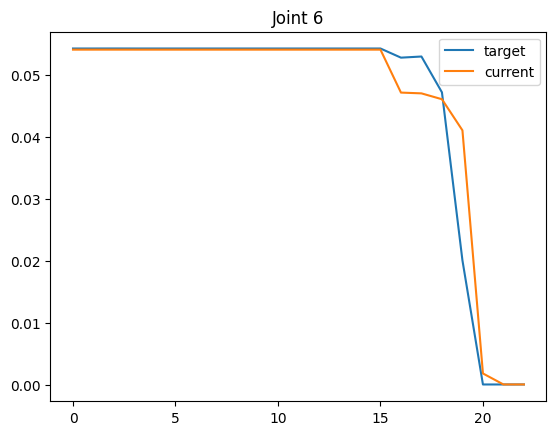

In [40]:
for i in range(7):
    plt.plot(target[:, i], label='target')
    plt.plot(current[:, i], label='current')
    plt.title(f'Joint {i}')
    plt.legend()
    plt.show()

## Other stuff

dict_keys(['time', 'rgb:top_down:224x224:2d', 'rgb:front:224x224:2d'])


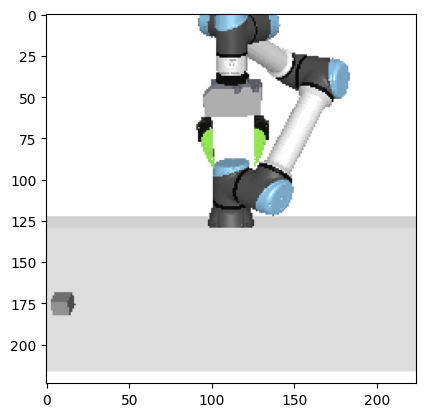

In [6]:
extero_dict = env.get_exteroception()
obs = env.get_obs(update_exteroception=True)
print(env.visual_dict.keys())
plt.imshow(env.visual_dict['rgb:front:224x224:2d'])
# plt.imshow(env.visual_dict['rgb:top_down:224x224:2d'])